<a href="https://colab.research.google.com/github/osadly/Courses/blob/main/Assignment03(07JUL2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 3  <font color="blue"> (15 points) </font>

***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors.
    
  Good luck!

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

Go to <a href=#PartA>Part A</a>
<br>
Go to <a href=#PartB>Part B</a>
<br>
Go to <a href=#PartC>Part C</a>
<br>
Go to <a href=#PartD>Part D</a>
<br>
Go to <a href=#Q_C>Questions & Comments</a>


### **Importing Libraries**

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error
#from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, svm
#from sklearn.linear_model import LinearRegression, Lasso

from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score #, r2_score

#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

In [3]:
# helper functions
# 1) PrintSeparator to print lines of repeated characters passed as the second parameter for the number of lines passed in the first parameters
def PrintSeparator(nLines=1,ch='-'):
  for i in range(nLines):
    print(ch*100)

def cus_print(var):
  print("numpy_array of type:" , type(var))
  PrintSeparator(nLines=1)
  print(var)
  PrintSeparator(nLines=2,ch='=')

def cus_print_numpyarray(npAr, printArFlag=False):
  print("ndim:", npAr.ndim, ", shape: ",npAr.shape)
  PrintSeparator(nLines=1)
  if printArFlag:
    print(npAr)
  else:
    print("first_element=", npAr[0], "last elemnent=" , npAr[len(npAr)-1])

  PrintSeparator(nLines=2,ch='=')

Part A <a name='PartA' />

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively.
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters.
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

### **A.1. Generate 100 points equally distanced from  −20  to  20  and save them in a numpy array x1. Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, respectively.**


#### **A.1.1. Generate 100 points equally distanced from  −20 to 20 and save them in a numpy array x1**

In [4]:
x1 = np.linspace(-20,20,100)

cus_print_numpyarray(x1, True)

#print(min(x1), max(x1), len(x1))

ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.

#### **A.1.2. Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, respectively.**

In [5]:
# Define X as a numpy array of 2 dimensions 6*100:
#   6 as objective is to store a total of 6 arrays (x^0 up to x^5)
#   100 as we have one hundred elements for each of the 6 arrays
X = np.empty(shape=(6,100))
X[0].fill(0) # will not be used in this problem - added for the sake of making array index matching the power for x
X[1] = x1

for i in range(4):
    X[i+2,:] = np.array([pow(x1Elm,i+2) for x1Elm in x1])  # define X[2] as X1^2 and X3 as X[3] as X1^3 same applies to X4 and X5

# Validate
for i in range(6):
  cus_print_numpyarray(X[i])

# creating variables with exact variable names asked in the questions
x2 = X[2] #np.array([pow(z,2) for z in x1])
x3 = X[3] #np.array([pow(z,3) for z in x1])
x4 = X[4] #np.array([pow(z,4) for z in x1])
x5 = X[5] #np.array([pow(z,5) for z in x1])

ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 0.0 last elemnent= 0.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= -20.0 last elemnent= 20.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 400.0 last elemnent= 400.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= -8000.0 last elemnent= 8000.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 160000.0 last elemnent= 160000.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= -3200000.0 last

### **A.2. Create your response y, a new numpy array, defined as  𝑦=1.75+5𝑥1+0.05𝑥3−10.3𝑥5+𝜀  , where  𝜀∼N(0,4)**

In [6]:
b0 = 1.75
b1 = 5
b3 = 0.05
b5 = -10.3
##------------------------------------------------------------------------
# generate epsilon : eps
mu, sigma = 0, 4 # mean and standard deviation
#eps = np.random.normal(mu, sigma, 10000000)
eps = np.random.normal(mu, sigma, 100)
#eps
#print(abs( np.mean(eps)))
#print(abs(np.std(eps)))
##------------------------------------------------------------------------
y = b0 + b1*x1 + b3*x3 + b5*x5 + eps
cus_print_numpyarray(y)

ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 32959495.310625866 last elemnent= -32959494.375847664


### **A.3. Using  5-fold cross-validation, with a reasonable train-test proportion, train a lasso regression model including all 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5, and for  10  different pre-determined tuning parameters.**

#### **A.3.1. Create data frame**

In [7]:

# transpose X and consider ONLY columns from x1 to x5 (ignore X0)
X_trnsps = np.transpose(X)
X_IndVar = np.transpose(X)[:,1:]
cus_print_numpyarray(X_IndVar)
'''
# convert numpy array to pandas data frame
df = pd.DataFrame(data=X_IndVar) # values

# rename column names
for i in range(5):
  df.rename({df.columns[i]:"x"+str(i+1)},axis=1,inplace=True)

df.index.names = ['Index']

print("df.keys()=" , df.keys())
df.head()
df.tail()
df.shape
'''

ndim: 2 , shape:  (100, 5)
----------------------------------------------------------------------------------------------------
first_element= [-2.0e+01  4.0e+02 -8.0e+03  1.6e+05 -3.2e+06] last elemnent= [2.0e+01 4.0e+02 8.0e+03 1.6e+05 3.2e+06]


'\n# convert numpy array to pandas data frame\ndf = pd.DataFrame(data=X_IndVar) # values\n\n# rename column names\nfor i in range(5):\n  df.rename({df.columns[i]:"x"+str(i+1)},axis=1,inplace=True)\n\ndf.index.names = [\'Index\']\n\nprint("df.keys()=" , df.keys())\ndf.head()\ndf.tail()\ndf.shape\n'

#### **A.3.1. A reasonable train-test proportion**

In [8]:
# 33% data used for validation
X_train, X_test, y_train, y_test = train_test_split(X_IndVar, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
cus_print_numpyarray(X_train)
cus_print_numpyarray(y_train)
cus_print_numpyarray(X_test)
cus_print_numpyarray(y_test)

(67, 5) (67,)
(33, 5) (33,)
ndim: 2 , shape:  (67, 5)
----------------------------------------------------------------------------------------------------
first_element= [-8.68686869e+00  7.54616876e+01 -6.55525771e+02  5.69446629e+03
 -4.94670809e+04] last elemnent= [0.60606061 0.36730946 0.22261179 0.13491624 0.08176742]
ndim: 1 , shape:  (67,)
----------------------------------------------------------------------------------------------------
first_element= 509439.2207810024 last elemnent= 3.9496360959087884
ndim: 2 , shape:  (33, 5)
----------------------------------------------------------------------------------------------------
first_element= [1.35353535e+01 1.83205795e+02 2.47975521e+03 3.35643634e+04
 4.54305525e+05] last elemnent= [1.43434343e+01 2.05734109e+02 2.95093368e+03 4.23265235e+04
 6.07107711e+05]
ndim: 1 , shape:  (33,)
----------------------------------------------------------------------------------------------------
first_element= -4679149.1085245665 last elemn

#### **A.3.2. Standardize/normalize Data first**

In [9]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
# dont train again on X_test. Standardization is a stateful transformation
X_test_std = scaler.transform(X_test)

#### **A.3.3. Using 5-fold cross-validation, with a reasonable train-test proportion, train a lasso regression model including all 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5, and for 10 different pre-determined tuning parameters**

In [10]:
# Set up 5-fold cross-validation
k=5 # five folds as requested
kf = KFold(n_splits=k, shuffle=True, random_state=47)

# 10 different pre-determined tuning parameters for Lasso:
# 1- STEP 1: first start with 10 different values for the tuning parameter/alpha (from 10^-4 to 10*4)
alphas_1 = np.logspace(-4, 4, 10)
cus_print_numpyarray(alphas_1, True)

lasso_model_1 = linear_model.Lasso()
grid_1 = dict()
grid_1['alpha'] = alphas_1
search_1 = GridSearchCV(lasso_model_1,grid_1,cv=kf, scoring='neg_mean_squared_error')
search_1_results = search_1.fit(X_train_std, y_train)

# summarize search_1 results
print('Config: ', search_1_results.best_params_, "at index: ", search_1_results.best_index_ )
print('MAE: ', -1 * search_1_results.best_score_)
alphas_1_best = search_1_results.best_params_['alpha']
print("alphas_1_best=",alphas_1_best)

# 2- STEP 2: Generate a range of 10 values around the best value to come up with the best value
alphas_2 = np.linspace(alphas_1_best-100,alphas_1_best+100,10)
cus_print_numpyarray(alphas_2, True)

lasso_model_2 = linear_model.Lasso()
grid_2 = dict()
grid_2['alpha'] = alphas_2
search_2 = GridSearchCV(lasso_model_2,grid_2,cv=kf, scoring='neg_mean_squared_error')
search_2_results = search_2.fit(X_train_std, y_train)

# summarize search_2 results => final results
print('Config: ', search_2_results.best_params_, "at index: ", search_2_results.best_index_ )
print('MAE: ', -1 * search_2_results.best_score_)
alphas_2_best = search_2_results.best_params_['alpha']
print("alphas_2_best=",alphas_2_best)


# initilize LassoCV Model
#lasso_model = linear_model.LassoCV(cv=5, alphas=alphas_initial)
#lasso_model.fit(X_train_std, y_train)
#lasso_model.score(X_train_std, y_train)

# Perform cross validation
#cv_scores_std = cross_val_score(lasso_model, X_train_std, y_train, cv=kf, scoring='neg_mean_squared_error')
#print(f'Cross-validation scores: {cv_scores_std}')
#print(f'Mean CV score [cv_scores_std]: {-1*cv_scores_std.mean()}')

#cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
#print(f'Cross-validation scores: {cv_scores}')
#print(f'Mean CV score [cv_scores]: {-1*cv_scores.mean()}')

ndim: 1 , shape:  (10,)
----------------------------------------------------------------------------------------------------
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Config:  {'alpha': 1291.5496650148827} at index:  8
MAE:  21893332.588070765
alphas_1_best= 1291.5496650148827
ndim: 1 , shape:  (10,)
----------------------------------------------------------------------------------------------------
[1191.54966501 1213.77188724 1235.99410946 1258.21633168 1280.4385539
 1302.66077613 1324.88299835 1347.10522057 1369.32744279 1391.54966501]
Config:  {'alpha': 1213.771887237105} at index:  1
MAE:  20072193.342017554
alphas_2_best= 1213.771887237105


### **A.4. Plot the cross-validated mean squared errors vs the tuning parameter's values and chose the best tuning parameter based on the plot. Does the best model chosen perform variable selection?**

#### **A.4.1. Plot the cross-validated mean squared errors vs the tuning parameter's values**

<Figure size 1200x800 with 0 Axes>

Text(1181.5496650148827, 20207046.2302669, 'alpha=1191.55, MSE=20107046.23')

Text(1225.994109459327, 20869893.845781803, 'alpha=1235.99, MSE=20769893.85')

Text(1270.4385539037717, 21544429.243623905, 'alpha=1280.44, MSE=21444429.24')

Text(1314.882998348216, 23485746.306875534, 'alpha=1324.88, MSE=23385746.31')

Text(1359.3274427926606, 24693415.441366773, 'alpha=1369.33, MSE=24593415.44')

Text(1223.771887237105, 20172193.342017554, 'alpha=1213.77, MSE=20072193.34')

Text(1268.2163316815495, 21657516.908291686, 'alpha=1258.22, MSE=21557516.91')

Text(1312.6607761259938, 22465832.523988746, 'alpha=1302.66, MSE=22365832.52')

Text(1357.1052205704382, 23756620.376709547, 'alpha=1347.11, MSE=23656620.38')

Text(1401.5496650148827, 24915623.981011525, 'alpha=1391.55, MSE=24815623.98')

Text(0.5, 0, 'Tuning Parameter (alpha)')

Text(0, 0.5, 'Cross-validated Mean Squared Errors')

Text(0.5, 1.0, "Cross-validated MSE VS. Tuning Parameter's Values")

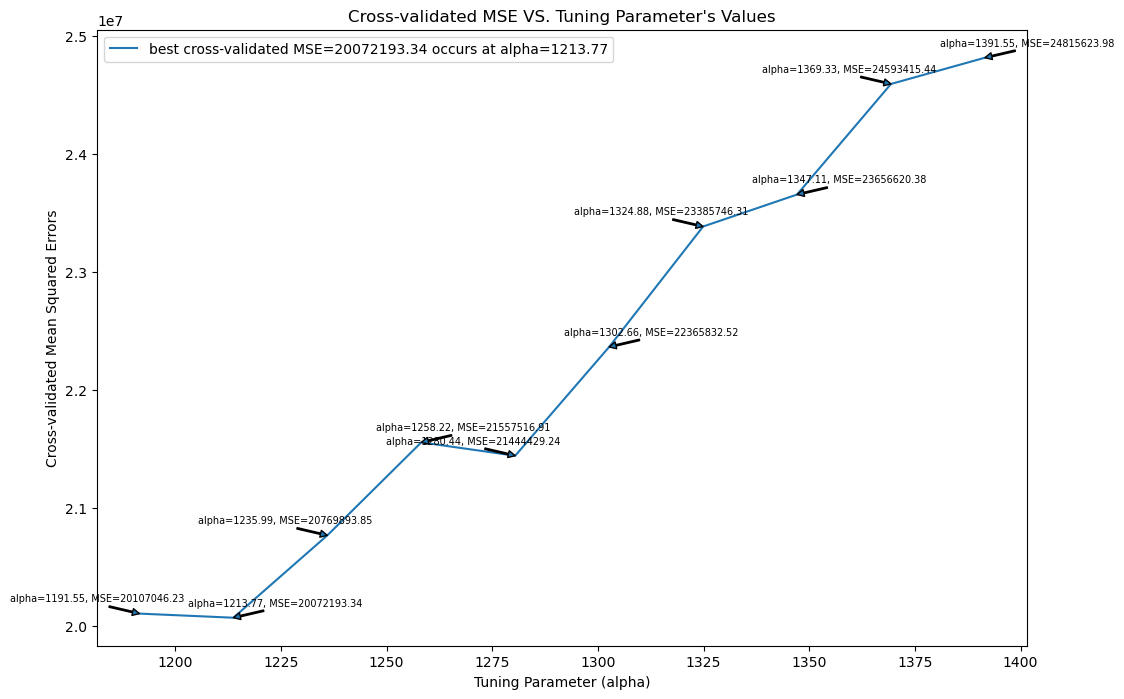

In [11]:
#print(-1*search_2_results.cv_results_['mean_test_score'])
plt.figure(figsize=(12,8))
#fig = plt.figure()
#alphas_2_best
#fig.add_subplot(211) #top left
plt.plot(alphas_2, -1*search_2_results.cv_results_['mean_test_score'])
#plt.plot(alphas_2, search_2_results.cv_results_['rank_test_score'])
#search_2_results.cv_results_['rank_test_score']
#locs, labels = plt.xticks()  # Get the current locations and labels.
#plt.xticks(range(10), alphas_2)
#plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations

#plt.annotate(round(alphas_2_best,2), xy =(alphas_2_best, 2e7), xytext =(alphas_2_best, 2e7),)
#plt.annotate(round(alphas_2[1],2), xy =(alphas_2[1], 2e7), xytext =(alphas_2_best, 2e7),)
label_yLoc=-1*search_2_results.cv_results_['mean_test_score']
labels_1=[0,2,3,5,7,8]
for i in range(0,10,2):
  plt.annotate(
      "alpha="+str(round(alphas_2[i],2))+", MSE="+str(round(label_yLoc[i],2)), 
               xy =(alphas_2[i], label_yLoc[i]), 
               xytext =(alphas_2[i]-10, label_yLoc[i]+1e5),
               arrowprops={"width":1,"headwidth":5,'headlength':5},
               horizontalalignment='center',fontsize=7)

for i in range(1,10,2):
  plt.annotate(
      "alpha="+str(round(alphas_2[i],2))+", MSE="+str(round(label_yLoc[i],2)), 
               xy =(alphas_2[i], label_yLoc[i]), 
               xytext =(alphas_2[i]+10, label_yLoc[i]+1e5),
               arrowprops={"width":1,"headwidth":5,'headlength':5},
               horizontalalignment='center',fontsize=7)


lbl1 = 'best cross-validated MSE='+str(-1 * round(search_2_results.best_score_,2))+" occurs at alpha="+str(round(alphas_2_best,2))
plt.legend(
    labels=[lbl1], 
           loc='upper left')

plt.xlabel("Tuning Parameter (alpha)")
plt.ylabel("Cross-validated Mean Squared Errors")
plt.title(r"Cross-validated MSE VS. Tuning Parameter's Values")
plt.show()

#### **A.4.2. Does the best model chosen perform variable selection**

**Yes, The best model chosen perform variable selection using GridSearchCV**

The best tuning parameter based on the plot is at index 1 of the *search_2_results.cv_results_['mean_test_score']* which is search_2_results.cv_results_[1] = 1213.77188724

**Part B <a name='PartB' />**

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data.
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


### **B.1. Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree  d  for the polynomial. What degree was chosen? Make a plot of the resulting polynomial fit to the data.**

#### **B.0.1. Loading Data & EDA**

In [12]:
# load the wage dataframe
wage_df = pd.read_csv("Wage.csv")
wage_df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [13]:
wage_df.shape

(3000, 13)

In [14]:
wage_df.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [15]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [16]:
if wage_df.isnull().any().sum() > 0:
    wage_df.isnull().any().sum()
else:
    print("Data is good - There is no null values in any of the columns")

Data is good - There is no null values in any of the columns


#### **B.1.1. Extract ONLY Age (Independent Variable) & Wage (Dependent Variable)**

In [17]:
# Defining independent and dependent variables
X_age = wage_df[['age']]   # indep. var.
y_wage = wage_df['wage']  # depend. var.

print(type(X_age), type(y_wage))

print(X_age.shape)
print(y_wage.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(3000, 1)
(3000,)


#### **B.1.2. First, visualize data as it is currently avilable in the dataframe before any proicessing for initial understanding.  no processing done / no logic applied**

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

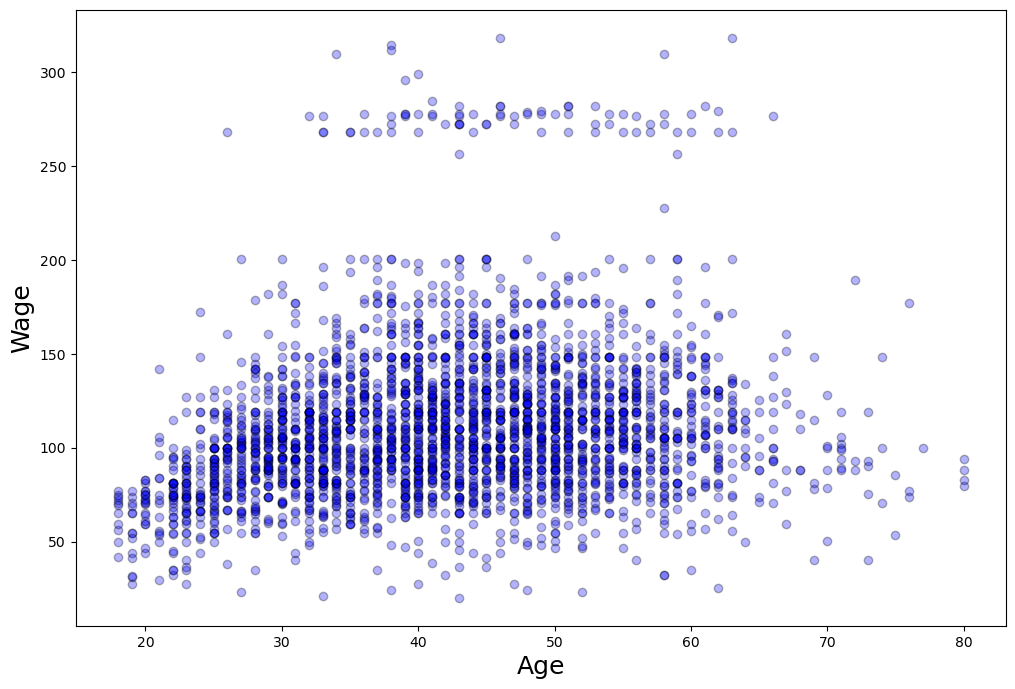

In [18]:
# Visualize the relationship b/w age and wage
size = plt.figure(figsize = (12,8))

# Training data
_ = plt.scatter(X_age, y_wage, facecolor='blue', edgecolor='k', alpha=0.3)

# Test data
#_ = plt.scatter(test_x, test_y, facecolor = "gray", alpha = .5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Wage', fontsize=18)
plt.show()

#### **B.1.3. Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial**

In [19]:
#X_age, y_wage

k=5
kf = KFold(n_splits=k, shuffle=True, random_state=47)

rmses = []

'''
dgr=2
print("* For degree :", dgr, ":")
polynomial_features = PolynomialFeatures(degree=(dgr))

#X_age2=np.array(X_age).reshape(-1,1)
X_age_poly = polynomial_features.fit_transform(X_age)

print(X_age)
print(X_age_poly[0])
print(type(X_age))
print(type(X_age_poly))
#X_age_poly2 = np.array(X_age_poly)[:,2].reshape(-1,1) #print()
print("X_age_poly.shape:", X_age_poly.shape)
#print("X_age_poly2.shape:", X_age_poly2.shape)

#y_wage2=np.array(y_wage).reshape(-1,1)
#print("y_wage2.shape:", y_wage2.shape)

cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='neg_mean_squared_error')
'''
# for degrees, test for range 1 to 10
for dgr in range(1,11):
  polynomial_features = PolynomialFeatures(degree=dgr)
  polynomial_features
  #X_age2=np.array(X_age).reshape(-1,1)
  X_age_poly = polynomial_features.fit_transform(X_age)

  #print(X_age)
  #print(X_age_poly[0])
  #print(type(X_age))
  #print(type(X_age_poly))
  #X_age_poly2 = np.array(X_age_poly)[:,2].reshape(-1,1) #print()
  #print("X_age_poly.shape:", X_age_poly.shape)
  #print("X_age_poly2.shape:", X_age_poly2.shape)

  #y_wage2=np.array(y_wage).reshape(-1,1)
  #print("y_wage2.shape:", y_wage2.shape)
  eqv_lnr_model = linear_model.LinearRegression()
  this_degree_rmses = -1*cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='neg_mean_squared_error')
  rmses_mean = round(this_degree_rmses.mean(),3)
  #print(X_age_poly.shape)
  #print(X_age_poly[0].shape)
  rmses.append(rmses_mean)
  print("* For degree :", dgr, ":", str(rmses_mean))
  eqv_lnr_model.fit(X_age_poly, y_wage)
  print(eqv_lnr_model.coef_)
  print(eqv_lnr_model.intercept_)
  #cdf = pd.DataFrame(data=X_age_poly, index=[i for i in range(X_age_poly.shape[0])], columns=['f'+str(i) for i in range(X_age_poly.shape[1])])
  ###print(eqv_lnr_model.coef_.shape)
  #data_=eqv_lnr_model.coef_
  #index_=['x'+str(i) for i in range(dgr)]
  #columns_=["Coefficients"] #['f'+str(i) for i in range(X_age_poly.shape[1])
  #print(data_.shape, index_.shape, columns_.shape)
  #cdf = pd.DataFrame(data=data_, index=index_, columns=columns_)
  #print(cdf)
  #this_degree_r2s = cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='r2')
  #r2s.append(this_degree_r2s.mean())
  #rmses.append(cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='neg_mean_squared_error'))
  #r2s.append(cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='r2'))


print("Best RMSE:",min(rmses)," at degree: ", rmses.index(min(rmses))+1)
#print("Best R2:",max(r2s)," at degree: ", r2s.index(max(r2s))+1)

print("Worst RMSE:",max(rmses)," at degree: ", rmses.index(max(rmses))+1)
#print("Worst r2s:",min(r2s)," at degree: ", r2s.index(min(r2s))+1)

'\ndgr=2\nprint("* For degree :", dgr, ":")\npolynomial_features = PolynomialFeatures(degree=(dgr))\n\n#X_age2=np.array(X_age).reshape(-1,1)\nX_age_poly = polynomial_features.fit_transform(X_age)\n\nprint(X_age)\nprint(X_age_poly[0])\nprint(type(X_age))\nprint(type(X_age_poly))\n#X_age_poly2 = np.array(X_age_poly)[:,2].reshape(-1,1) #print()\nprint("X_age_poly.shape:", X_age_poly.shape)\n#print("X_age_poly2.shape:", X_age_poly2.shape)\n\n#y_wage2=np.array(y_wage).reshape(-1,1)\n#print("y_wage2.shape:", y_wage2.shape)\n\ncross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring=\'neg_mean_squared_error\')\n'

PolynomialFeatures(degree=1)

* For degree : 1 : 1675.263


LinearRegression()

[0.         0.70727593]
81.70473544394636


PolynomialFeatures()

* For degree : 2 : 1599.233


LinearRegression()

[ 0.          5.29403003 -0.05300507]
-10.42522426202855


PolynomialFeatures(degree=3)

* For degree : 3 : 1594.36


LinearRegression()

[ 0.00000000e+00  1.01899915e+01 -1.68028587e-01  8.49452197e-04]
-75.24391422396907


PolynomialFeatures(degree=4)

* For degree : 4 : 1592.453


LinearRegression()

[ 0.00000000e+00  2.12455205e+01 -5.63859313e-01  6.81068771e-03
 -3.20383038e-05]
-184.15417975670027


PolynomialFeatures(degree=5)

* For degree : 5 : 1591.998


LinearRegression()

[ 0.00000000e+00  3.99304398e+00  2.75976776e-01 -1.26497898e-02
  1.83462216e-04 -9.15709436e-07]
-49.704625197545866


PolynomialFeatures(degree=6)

* For degree : 6 : 1591.457


LinearRegression()

[ 0.00000000e+00 -9.31451754e+01  6.25695282e+00 -2.00632223e-01
  3.37390776e-03 -2.87232729e-05  9.75186133e-08]
577.8029824057953


PolynomialFeatures(degree=7)

* For degree : 7 : 1591.457


LinearRegression()

[ 0.00000000e+00  1.60014820e+02 -1.26637309e+01  5.54653575e-01
 -1.40549146e-02  2.04301886e-04 -1.57779281e-06  5.00745362e-09]
-815.4039416945457


PolynomialFeatures(degree=8)

* For degree : 8 : 1591.707


LinearRegression()

[ 0.00000000e+00  8.27231443e-02  9.59610934e-01 -8.56346582e-02
  4.14173334e-03 -1.16567077e-04  1.85755228e-06 -1.54499766e-08
  5.19744610e-11]
-23.665425353418428


PolynomialFeatures(degree=9)

* For degree : 9 : 1591.782


LinearRegression()

[ 0.00000000e+00  4.87315257e-06  1.23497989e-04  1.14450661e-03
  6.69733536e-04 -4.29560005e-05  1.04516055e-06 -1.20029888e-08
  6.18853003e-11 -9.90333260e-14]
35.27699456255458


PolynomialFeatures(degree=10)

* For degree : 10 : 1591.595


LinearRegression()

[ 0.00000000e+00 -2.29544008e-06  1.27077310e-06  2.01072101e-05
  1.68003531e-04  1.67581826e-05 -1.69395057e-06  5.36215826e-08
 -8.10316183e-10  6.00538981e-12 -1.75807282e-14]
44.97819302348533
Best RMSE: 1591.457  at degree:  6
Worst RMSE: 1675.263  at degree:  1


In [20]:
x_train = np.array(age_x).reshape(-1,1)

# construct polynomial features based on degree
rmses = []
r2s = []
for dgr in range(1,11):
  polynomial_features = PolynomialFeatures(degree=(dgr))
  age_x_poly = polynomial_features.fit_transform(x_train)
  print(x_train_poly.shape)

  # Fit the polynomial regression model
  eqv_lnr_model = linear_model.LinearRegression()
  eqv_lnr_model.fit(x_train_poly, train_y)
  y_poly_pred = eqv_lnr_model.predict(x_train_poly)

  # Evaluate the model
  rmse = np.sqrt(mean_squared_error(train_y, y_poly_pred))
  r2 = r2_score(train_y, y_poly_pred)
  rmses.append(rmse)
  r2s.append(r2)
  print("RMSE:", rmse, "R2: ", r2)

print("Best RMSE:",min(rmses)," at degree: ", rmses.index(min(rmses))+1)
print("Best R2:",max(r2s)," at degree: ", r2s.index(max(r2s))+1)

print("Worst RMSE:",max(rmses)," at degree: ", rmses.index(max(rmses))+1)
print("Worst r2s:",min(r2s)," at degree: ", r2s.index(min(r2s))+1)

#y_poly_pred.shape
# rms is the square root of mean squared error
#rms = sqrt(mean_squared_error(test_y, ypred))
#print(rms)

'''
for i in range(1,10):
    polynomial_features = PolynomialFeatures(degree=i)

    x_train_p = polynomial_features.fit_transform(x_train)
    x_train_p.shape
    model_poly = sm.OLS(train_y, x_train_p).fit()
    ypred = model_poly.predict(x_train_p)
    ypred.shape
    # rms is the square root of mean squared error
    #rms = sqrt(mean_squared_error(test_y, ypred))
    #print(rms)
'''

NameError: name 'age_x' is not defined

#### **B.1.4. What degree was chosen?**

Degree 7 was chosen as it has the Minimum RMSE (= 1591.455)

#### **B.1.5. Make a plot of the resulting polynomial fit to the data.**

### **B.2. Fit a step function to predict wage using age , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.**

#### **B.2.1. Fit a step function to predict wage using age , and perform cross-validation to choose the optimal number of cuts**

In [ ]:
#X_age, y_wage

k=5
kf = KFold(n_splits=k, shuffle=True, random_state=47)

rmses = []


#### **B.2.2. Make a plot of the fit obtained**

Part C <a name='PartC' />


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


links

### Most Important

Titanic Tutorial
https://www.kaggle.com/code/alexisbcook/titanic-tutorial

Titanic Data:
https://www.kaggle.com/c/titanic/data

Random Forest on Titanic Dataset
https://medium.com/analytics-vidhya/random-forest-on-titanic-dataset-88327a014b4d

Titanic Survivals with SVM
https://www.kaggle.com/code/eltonpaes/titanic-survivals-with-svm


Done:
* SVM AND RANDOM FOREST: A Case Study
https://medium.com/@pandeypragati2112/svm-and-random-forest-a-case-study-6213da5be02f

* svm/random forest /decision tree/Knn algorithm: https://www.kaggle.com/code/prasadkevin/svm-random-forest-decision-tree-knn-algorithm

https://www.kaggle.com/datasets/rabieelkharoua/predict-online-course-engagement-dataset

https://www.kaggle.com/datasets

https://www.geeksforgeeks.org/when-to-use-random-forest-over-svm-and-vice-versa/

https://medium.com/@ap.nattapoj_st/basic-comparison-between-randomforest-svm-and-xgboost-0e5862871175

https://medium.com/@pandeypragati2112/svm-and-random-forest-a-case-study-6213da5be02f

https://ai.plainenglish.io/implementing-naive-bayes-random-forest-and-svm-for-classification-a-tutorial-with-code-and-47f76d7361dc

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

### ==========================================================
R language
Exploring Survival in Titanic
https://www.kaggle.com/code/mrisdal/exploring-survival-on-the-titanic

### **C.1.1. A data set of my choice:**

### **C.1.2. Applying SVM**

### **C.1.3. Applying Random Forest**

Part D <a name='PartD' />

## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters.
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data.
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


<Figure size 800x600 with 0 Axes>

C:\Users\osadl\AppData\Local\Temp\ipykernel_37288\3344385106.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


Text(0.5, 1.0, 'Synthetic Data with Gaussian Clusters')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

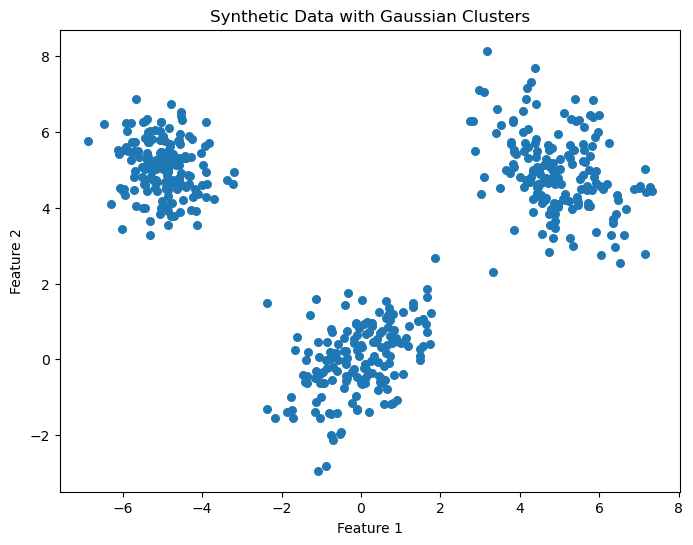

In [21]:
# Seed for reproducibility
np.random.seed(42)

# Parameters for Gaussian clusters
n_samples = 500
n_features = 2
n_clusters = 3

# Means and covariances for each cluster
means = np.array([[0, 0], [5, 5], [-5, 5]])
covariances = np.array([[[1, 0.5], [0.5, 1]], [[1, -0.3], [-0.3, 1]], [[0.5, 0], [0, 0.5]]])

# Generate samples for each cluster
X = np.vstack([np.random.multivariate_normal(mean, cov, n_samples // n_clusters) 
               for mean, cov in zip(means, covariances)])

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Synthetic Data with Gaussian Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Questions & Comments <a name='Q_C' />

## **Questions & Comments:**

### For part A
1. confirm using standardization ?

2. Confirm it is ok to use GridSearchCV for best tuning parameter - share logic

3. need clarification for "Does the best model chosen perform variable selection" A.4

4. not sure about the scope of the question as no final result required for predict (only fit done but no prediction - just logic for selecting best tuning parameter but no predict)

### For Part B
1. I understand that usually it is degree 3 that is best and as mentioned in the session/lab by Arbaaz, we ususally don't need to go over degree 3 but here in this question , degree 7 is the best (also very small improvement in RMSE or minor advantage over degree 6). so need to confirm that no missing steps or nothing wrong I did for the steps

***=> in the session - some comments provided for Part B (Jaafar question)***